## DATA PREPARATION

In [ ]:
import pandas as pd
import numpy as np

### part a

In [ ]:
train_x_a = pd.read_csv('training.csv')
train_y = train_x_a.pop('price')

In [ ]:
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [ ]:
train_y.head(2)

0    15985.0
1     7349.0
Name: price, dtype: float64

### part b

In [ ]:
nan_columns = [train_x_a.isna]
train_y = train_y.dropna()
train_x_a = train_x_a.drop(train_x_a.index.difference(train_y.index))
train_x_b = train_x_a.fillna(train_x_a.median())

In [ ]:
print(nan_columns)

[<bound method DataFrame.isna of     fueltype aspiration doornumber    carbody drivewheel enginelocation  \
0        gas        std       four      sedan        rwd          front   
1        gas        std       four      wagon        fwd          front   
2        gas        std       four      sedan        fwd          front   
3        gas        std       four      sedan        rwd          front   
4        gas        std       four      sedan        fwd          front   
..       ...        ...        ...        ...        ...            ...   
159   diesel      turbo       four      wagon        rwd          front   
160      gas      turbo        two  hatchback        fwd          front   
161      gas        std       four      sedan        fwd          front   
162      gas        std        two  hatchback        fwd          front   
163      gas        std       four      wagon        4wd          front   

     wheelbase  carlength  carwidth  carheight  ...  cylindernumbe

In [ ]:
train_x_b.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,3.31,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


### part c

In [ ]:
categorical_columns = [train_x_b.select_dtypes(include=['object'])]

In [ ]:
print(categorical_columns)

[    fueltype aspiration doornumber    carbody drivewheel enginelocation  \
0        gas        std       four      sedan        rwd          front   
1        gas        std       four      wagon        fwd          front   
2        gas        std       four      sedan        fwd          front   
3        gas        std       four      sedan        rwd          front   
4        gas        std       four      sedan        fwd          front   
..       ...        ...        ...        ...        ...            ...   
159   diesel      turbo       four      wagon        rwd          front   
160      gas      turbo        two  hatchback        fwd          front   
161      gas        std       four      sedan        fwd          front   
162      gas        std        two  hatchback        fwd          front   
163      gas        std       four      wagon        4wd          front   

    enginetype cylindernumber fuelsystem  
0          ohc           four       mpfi  
1          o

### part d

In [ ]:

# Get one hot encoding of categorical columns 
one_hot = pd.get_dummies(train_x_b.select_dtypes(include=['object']))
# Drop categorical columns as they are now encoded
train_x_b = train_x_b.drop(train_x_b.select_dtypes(include=['object']), axis=1)
                           
train_x_d = train_x_b.join(one_hot)


In [ ]:
train_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,104.3,188.8,67.2,56.2,2403.0,141.0,3.31,3.15,9.5,114.0,...,0,0,0,0,0,0,0,0,1,0
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,0,0,0,0,1,0,0,0,0,0


### part e

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train_x_e = StandardScaler().fit_transform(train_x_d)
train_x_e = pd.DataFrame(train_x_e)

In [ ]:
train_y = np.array(train_y).reshape(-1,1)
train_y = StandardScaler().fit_transform(train_y)
train_y = pd.DataFrame(train_y)

In [ ]:
train_x_e.head(2)

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1.040486,1.218356,0.697865,1.103479,-0.217359,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,-0.315104,-0.080582,1.146051,-0.248282
1,-0.729389,-0.266100,-1.003614,-0.089818,-0.968641,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,-0.080582,-0.080582,-0.114332,-0.248282,1.387274,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282


In [ ]:
#to see train_y after standard scaler process
train_y.head(2)

,0
0,0.398216
1,-0.722290


## LINEAR REGRESSION TO PREDICT CAR PRICES

### part f

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
lr_model =  LinearRegression()
lr_model.fit(train_x_e, train_y)
print(lr_model.intercept_)
print(lr_model.coef_)

[-8.58383937e-17]
[[-0.02367956  0.00230665  0.06264456  0.01356987  0.20684221  0.55230091
  -0.00505928 -0.17151327  0.04992137  0.16959429  0.0671188  -0.08520277
   0.11804875  0.00823237 -0.00823237 -0.04476536  0.04476536 -0.01027575
   0.01027575  0.04011228  0.00544195 -0.04561565  0.02757743  0.00343087
  -0.01302893 -0.00719805  0.01317153 -0.03474573  0.03474573 -0.04819098
  -0.02431445  0.15266727 -0.01101266 -0.22394155  0.02293906  0.20728744
  -0.01784687 -0.12922212  0.07359232  0.05593758 -0.04098508  0.02293906
   0.01691032 -0.00790724  0.02293906  0.00823237 -0.0154429   0.02374939
  -0.06705256]]


In [ ]:
predict_y = lr_model.predict(train_x_e)

In [ ]:
mse = metrics.mean_squared_error(train_y, predict_y)
mse

0.07227854876204917

### part g

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
train_mse_score = np.abs(cross_val_score(lr_model, train_x_e, train_y, cv=5, scoring = "neg_mean_squared_error"))
print(train_mse_score)

[0.16931404 0.11686345 0.13485668 0.19345987 0.10267108]


In [ ]:
average_mse = np.mean(train_mse_score)
print(average_mse)

0.1434330257380974


### part h

In [ ]:
test_x = pd.read_csv('test.csv')
test_y = test_x.pop('price')

In [ ]:
test_x.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,...,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
1,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,...,four,110.0,1bbl,3.15,3.58,9.0,86.0,NaN,27.0,33.0


In [ ]:
test_y.head(2)

0    18920.0
1    10295.0
Name: price, dtype: float64

In [ ]:
nan_columns_test = [test_x.isna]
test_y = test_y.dropna()
test_x = test_x.drop(test_x.index.difference(test_y.index))
test_x = test_x.fillna(test_x.median())
print(nan_columns_test)

[<bound method DataFrame.isna of    fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0       gas        std       four        wagon        fwd          front   
1       gas        std       four        sedan        fwd          front   
2    diesel      turbo        two      hardtop        rwd          front   
3       gas        std       four        sedan        rwd          front   
4       gas        std        two      hardtop        rwd           rear   
5       gas        std        two  convertible        rwd          front   
6       gas        std       four        sedan        rwd          front   
7       gas        std       four        sedan        4wd          front   
8    diesel      turbo       four        sedan        rwd          front   
9       gas        std       four        sedan        rwd          front   
11      gas        std       four        wagon        rwd          front   
12      gas        std       four        wagon        f

In [ ]:
test_x.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,...,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
1,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,...,four,110.0,1bbl,3.15,3.58,9.0,86.0,5050.0,27.0,33.0


In [ ]:
categorical_columns_test = [test_x.select_dtypes(include=['object'])]
print(categorical_columns_test)

[   fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0       gas        std       four        wagon        fwd          front   
1       gas        std       four        sedan        fwd          front   
2    diesel      turbo        two      hardtop        rwd          front   
3       gas        std       four        sedan        rwd          front   
4       gas        std        two      hardtop        rwd           rear   
5       gas        std        two  convertible        rwd          front   
6       gas        std       four        sedan        rwd          front   
7       gas        std       four        sedan        4wd          front   
8    diesel      turbo       four        sedan        rwd          front   
9       gas        std       four        sedan        rwd          front   
11      gas        std       four        wagon        rwd          front   
12      gas        std       four        wagon        fwd          front   
13      gas

In [ ]:
# Get one hot encoding of categorical columns 
one_hot_test = pd.get_dummies(test_x.select_dtypes(include=['object']))
# Drop categorical columns as they are now encoded
test_x = test_x.drop(test_x.select_dtypes(include=['object']), axis=1)
                           
test_x_a = test_x.join(one_hot_test)
test_x_a.head(2)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,...,0,0,0,0,0,0,0,0,1,0
1,96.5,175.4,62.5,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
test_x_b = StandardScaler().fit_transform(test_x_a)
test_x_b = pd.DataFrame(test_x_b)
test_y = np.array(test_y).reshape(-1,1)
test_y = StandardScaler().fit_transform(test_y)
test_y = pd.DataFrame(test_y)
print(test_x_b.head(2))
print(test_y.head(2))

         0         1         2         3         4         5         6   \
0  0.932810  1.326619  2.076961  0.566013  0.430246 -0.042623 -0.712848   
1 -0.517275 -0.097773 -1.500195 -0.092620 -0.701135 -0.583212 -0.859073   

         7         8         9   ...        39        40        41        42  \
0  0.347447 -0.498378  0.047788  ... -0.229416 -0.229416 -0.229416 -0.229416   
1  0.987246 -0.379717 -0.479532  ... -0.229416 -0.229416 -0.229416  4.358899   

         43        44        45        46        47        48  
0 -0.460566 -0.160128 -0.377964 -0.229416  0.951190 -0.229416  
1 -0.460566 -0.160128 -0.377964 -0.229416 -1.051315 -0.229416  

[2 rows x 49 columns]
          0
0  0.399192
1 -0.529960


### part i

In [ ]:
lr_model_test =  LinearRegression()
lr_model_test.fit(test_x_b, test_y)
print(lr_model_test.intercept_)
print(lr_model_test.coef_)

[8.01583215e-16]
[[ 1.14607336e-01 -4.16341555e-01  5.03807679e-01 -2.98633809e-01
   1.87746613e-01 -8.84150741e-01  4.54958122e-01 -5.10647709e-01
  -7.85948836e+00  5.43258079e-01  9.46860470e-02 -7.84546491e-01
  -1.14825271e+00  3.00721399e+00 -3.00721399e+00  4.68893519e-01
  -4.68893519e-01  1.96937555e-01 -1.96937555e-01  7.12679788e-01
   2.72652408e-01 -5.18412967e-01  1.25763500e-01 -1.11521942e-01
  -3.06908795e-01  2.00602361e-01 -6.46351472e-02 -4.64338894e-01
   4.64338894e-01  6.59600324e-02 -3.81346111e-01  1.00026188e+00
  -9.45542005e-01 -4.96328204e-01  1.07202556e-01  1.10452274e+00
  -8.19711364e-01 -2.49112233e-01  2.74574848e-01 -6.94339459e-03
   1.56378698e-02  1.07202556e-01 -3.26152374e-01 -7.42453804e-02
  -4.67344559e-01  3.00721399e+00 -1.19185414e+00 -1.25127126e+00
   2.85977483e-01]]


In [ ]:
predicted_values = lr_model_test.predict(test_x_b)

In [ ]:
print(predicted_values[10:13])

[[ 0.14496951]
 [-0.85800579]
 [-0.77373567]]


In [ ]:
test_mse_score = metrics.mean_squared_error(test_y, predicted_values)
print(test_mse_score)

0.00028908276387713475


### part j

In [ ]:
from sklearn import linear_model

In [ ]:
lasso =  linear_model.Lasso()
lasso.fit(train_x_e, train_y)
predict_y_lasso = lasso.predict(train_x_e)

In [ ]:
mse_lasso = metrics.mean_squared_error(train_y, predict_y_lasso)
mse_lasso

1.0

In [ ]:
train_mse_score_lasso = np.abs(cross_val_score(lasso, train_x_e, train_y, cv=5, scoring = "neg_mean_squared_error"))
print(train_mse_score_lasso)
average_mse_lasso = np.mean(train_mse_score_lasso)
print(f"Average MSE score by using Lasso Regularization is {average_mse_lasso}")

[1.29460171 0.9056841  0.58732672 1.3585212  0.88906471]
Average MSE score by using Lasso Regularization is 1.007039686779128


### part k

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

In [ ]:
#lasso defines before as linear_model.Lasso()
#Here, train_scores: scores on training sets and validation_scores: scores on test sets
#In 5-fold cv, after the process, 5 training sets and 5 testing sets
#because alpha takes 300 different values, we get 300x5 array for each score.
train_scores, validation_scores = validation_curve(lasso, train_x_e, train_y, param_name="alpha",
                                                   param_range=np.arange(1, 3000, 10), cv=5,
                                                   scoring = "neg_mean_squared_error")

all_scores = np.abs(validation_scores) 

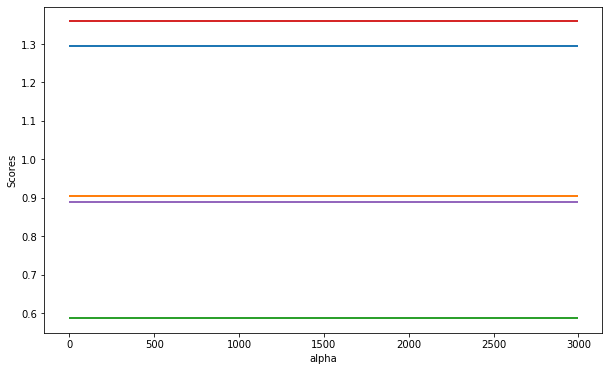

In [ ]:
# Plot of scores
alphas = np.arange(1, 3000, 10)

plt.figure(figsize=(10,6))
model = lasso_cv
plt.plot(alphas, all_scores, linewidth=2)
plt.xlabel('alpha')
plt.ylabel('Scores')
plt.show()

In [ ]:
min_error = np.min(all_scores)
min_alpha = lasso_cv.alpha_

In [ ]:
print(f"Minimum error was {round(min_error, 2)} at alpha {min_alpha}")

Minimum error was 0.59 at alpha 2991
